In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In c:\users\dyeagly\appdata\local\programs\python\python37\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be re

In [2]:
data = np.genfromtxt('scan_data.txt', delimiter=' ', skip_header=1)
data = data[:, :-1]
print(data.shape)

(18814, 6)


In [3]:
from zeisscmm import transform_points

In [4]:
coord_diff = np.genfromtxt('test_program/mag_test_mcs.txt', delimiter=' ')
R = coord_diff[:9].reshape((3,3))
T = coord_diff[9:]

In [5]:
data[:, :3] = transform_points(data[:, :3], T, R, inverse=True)
data_pcs = data.copy()
print(data_pcs.shape)

(18814, 6)


In [6]:
x = data_pcs[:, 0]
y = data_pcs[:, 1]
z = data_pcs[:, 2]
Bx = data_pcs[:, 3]
By = data_pcs[:, 4]
Bz = data_pcs[:, 5]

In [7]:
B_norm = np.linalg.norm(np.array((Bx, By, Bz)).T, axis=1)

In [8]:
Bx_norm = Bx/B_norm
By_norm = By/B_norm
Bz_norm = Bz/B_norm

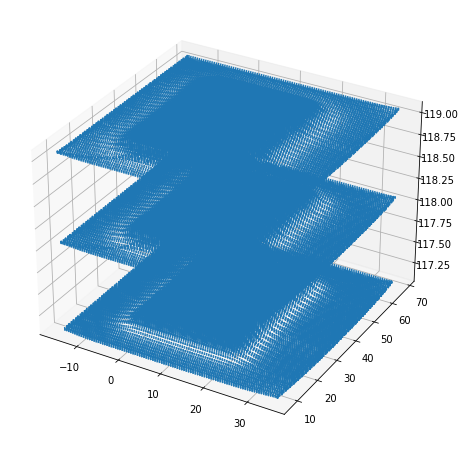

In [9]:
fig = plt.figure(figsize=(16,8))
ax = fig.gca(projection='3d')
q = ax.quiver(x, y, z, Bx_norm, By_norm, Bz_norm, length=0.2)

plt.show()

In [10]:
def plot(xyzijk, length, norm=False):
    fig = plt.figure(figsize=(16,8))
    ax = fig.gca(projection='3d')
    ax.quiver(*xyzijk, length=length, normalize=norm)
    ax.set_xlabel('x axis [mm]')
    ax.set_ylabel('y axis [mm]')
    ax.set_zlabel('z axis [mm]')
    plt.show()

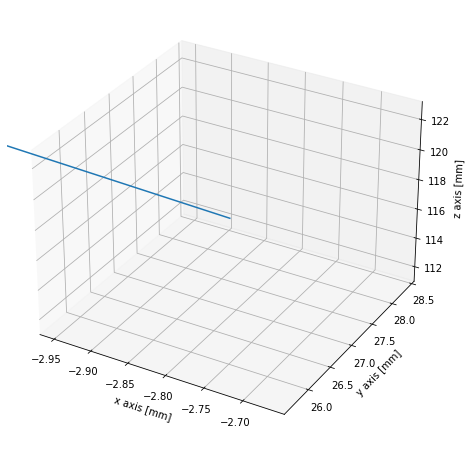

In [11]:
plot(data_pcs[2000], length=1)